<a href="https://colab.research.google.com/github/johnsonwust/2048/blob/master/%E6%9C%AA%E5%91%BD%E5%90%8Dmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NumPy是一个开源的Python库，它是Python科学计算的基础包之一。
### NumPy提供了一个高性能的多维数组对象和这些数组的操作工具。它是许多高级数学函数和操作的基础。
### NumPy数组通常比Python的内置列表更高效，尤其是在进行大规模计算时。
### 性能：NumPy内部采用C语言编写，能够提供快速的数组处理能力。
### 通常，为了方便，我们会使用np作为NumPy的别名
## `import numpy as np`这样，你就可以通过np前缀来使用NumPy提供的各种功能和对象了。

In [9]:
# 导入NumPy库，NumPy是Python的一个开源数值计算扩展库，用于大规模数据的多维数组操作。
import numpy as np

## `.npz文件是一种由NumPy提供的打包文件格式`，用于存储多个NumPy数组。这种文件格式非常适合用来存储数据集，可以高效地存储大量的数组数据。
### 从本地的mnist.npz文件中加载MNIST数据集，包括训练集和测试集的图像及其对应的标签。加载后的数据可以用于训练机器学习模型，如神经网络，进行手写数字识别任务。
### MNIST是一个手写数字的大型数据库，广泛用于训练各种图像处理系统。数据集包含60,000个训练样本和10,000个测试样本。

In [10]:
# 指定本地 mnist.npz 文件的路径。mnist.npz是一个打包了MNIST数据集的文件，包含训练集和测试集。
path = './mnist.npz'

### 在加载了.npz文件之后，如果你想要知道里面包含的数组的标签（即键名）和每个数组的内容长度（或形状），你可以使用以下方法来探索这个.npz文件的内容：

##查看所有包含的数组标签（键名）
### 当你使用np.load()函数加载了.npz文件后，可以通过.files属性来获取所有存储在其中的数组的键名列表。这些键名对应于你保存数据时所使用的关键字。

## 查看每个数组的形状
### 一旦你知道了键名，就可以通过这些键名来访问相应的数组，并使用.shape属性来获取每个数组的形状。

In [11]:
# 使用NumPy的load函数直接加载.npz文件
with np.load(path, allow_pickle=True) as data:
    # 打印所有包含的数组的键名
    print("Keys in the npz file:", data.files)

    # 遍历所有键名，并打印每个数组的形状
    for key in data.files:
        print(f"Shape of the array under key '{key}':", data[key].shape)

Keys in the npz file: ['x_test', 'x_train', 'y_train', 'y_test']
Shape of the array under key 'x_test': (10000, 28, 28)
Shape of the array under key 'x_train': (60000, 28, 28)
Shape of the array under key 'y_train': (60000,)
Shape of the array under key 'y_test': (10000,)


## 这段代码是用于加载MNIST数据集的
### 这个数据集常被用作计算机视觉和机器学习领域的入门级数据集。
### train_images和test_images包含的是图像数据，每个图像由28x28的像素值构成，像素值的范围通常是0到255，表示图像的灰度级别（黑白图像）。
### train_labels和test_labels包含的是每个图像对应的标签，即图像中手写数字的实际值（0到9）。

In [12]:
# 使用 NumPy 的 load 函数直接加载 .npz 文件。
# allow_pickle=True 参数允许加载存储在npz文件中的对象数组，这是因为MNIST数据集的标签是以列表形式存储的。
with np.load(path, allow_pickle=True) as f:
    # 从文件中提取训练集的图像和标签。
    # f['x_train'] 获取训练集图像，这是一个形状为 (60000, 28, 28) 的数组，
    # 表示有60,000个样本，每个样本是28x28像素的图像。
    train_images, train_labels = f['x_train'], f['y_train']

    # 从文件中提取测试集的图像和标签。
    # f['x_test'] 获取测试集图像，这是一个形状为 (10000, 28, 28) 的数组，
    # 表示有10,000个样本，每个样本是28x28像素的图像。
    test_images, test_labels = f['x_test'], f['y_test']

## 查看训练图像的维度
## 输出形如 (60000, 28, 28)，表示有60,000个训练图像，每个图像为28x28像素。

In [13]:
print("Training images shape:", train_images.shape)

Training images shape: (60000, 28, 28)


## 获取训练标签的数量
## 输出 60000，表示有60,000个训练标签。

In [14]:
print("Number of training labels:", len(train_labels))

Number of training labels: 60000


## 查看训练标签数组
## 输出一个包含60,000个元素的数组，每个元素是0到9之间的整数，对应训练图像的手写数字。

In [15]:
print("Training labels:", train_labels)

Training labels: [5 0 4 ... 5 6 8]


## 查看测试图像的维度
## 输出形如 (10000, 28, 28)，表示有10,000个测试图像，每个图像为28x28像素。

In [16]:
test_images.shape

(10000, 28, 28)

## 获取测试标签的数量
## 输出 10000，表示有10,000个测试标签。

In [17]:
print("Number of test labels:", len(test_labels))

Number of test labels: 10000


## 查看测试标签数组
## 输出一个包含10,000个元素的数组，每个元素是0到9之间的整数，对应测试图像的手写数字。

In [18]:
print("Test labels:", test_labels)

Test labels: [7 2 1 ... 4 5 6]


## 选择一个索引，然后打印出该索引对应的图像数组和标签。以下是一个简单的示例，展示如何实现这一点
### 首先加载了MNIST数据集中的训练图像和标签。然后，我们选择了索引0来查看第一个训练图像及其对应的标签。我们通过打印出图像的数组来查看其完整的像素值，这个数组将是一个28x28的二维数组，其中的每个元素代表一个像素的灰度值（在0到255之间）。接着，我们打印出这个图像对应的标签，这是一个0到9之间的整数，表示图像中手写数字的真实值。最后，我们使用matplotlib库来可视化这个图像。

Image Array:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  70 100 100 100 100 100 100  70   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 148 250 253 253 253 253 253 253 250 243 244 1

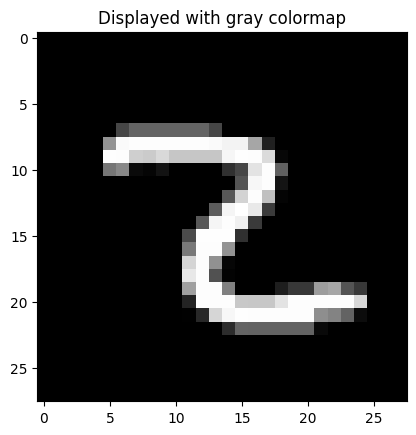

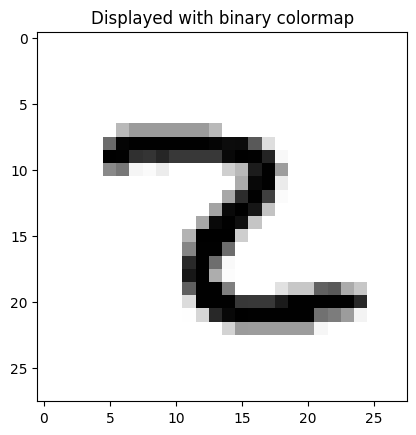

In [19]:
import matplotlib.pyplot as plt

# 假设 train_images 和 train_labels 已经被加载

# 选择一个索引，例如0，来查看第一个训练图像及其标签
index = 650
image = train_images[index]
label = train_labels[index]

# 设置NumPy打印选项，增加行宽，以便于一维打印未结束就不会换行
np.set_printoptions(linewidth=200)

# 打印出图像的数组
print("Image Array:")
print(image)

# 打印出对应的标签
print("Label:", label)

# 可视化图像
# 使用 'gray' 颜色映射显示图像
plt.imshow(image, cmap='gray')
plt.title('Displayed with gray colormap')
plt.show()

# 使用 'binary' 颜色映射显示图像
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Displayed with binary colormap')
plt.show()

### 这段代码使用Matplotlib库在一个大的画布上绘制了MNIST数据集中的前100个图像，并为每个图像显示了对应的标签。这是数据探索的一部分，可以帮助理解和可视化你正在处理的数据。
#### for i in range(100):：这个循环遍历前100个图像和标签。
#### plt.subplot(10,10,i+1)：这行代码将画布分割成10x10的网格，并在第i+1个子图位置绘制图像。这意味着每行和每列都将显示10个图像，共100个图像。
#### plt.xticks([])和plt.yticks([])：这两行代码移除了子图的x轴和y轴的刻度标记，使图像更加清晰。
#### plt.grid(False)：这行代码关闭了网格线的显示，因为对于图像显示来说，网格线是不必要的。
#### plt.imshow(train_images[i], cmap=plt.cm.binary)：这行代码显示第i个训练图像。cmap=plt.cm.binary参数设置了颜色映射为二值（黑白），这对于MNIST这样的灰度图像来说是理想的。
#### plt.xlabel(train_labels[i], fontsize=16)：这行代码为每个图像设置了一个标签，即对应的数字。fontsize=16设置了标签的字体大小。

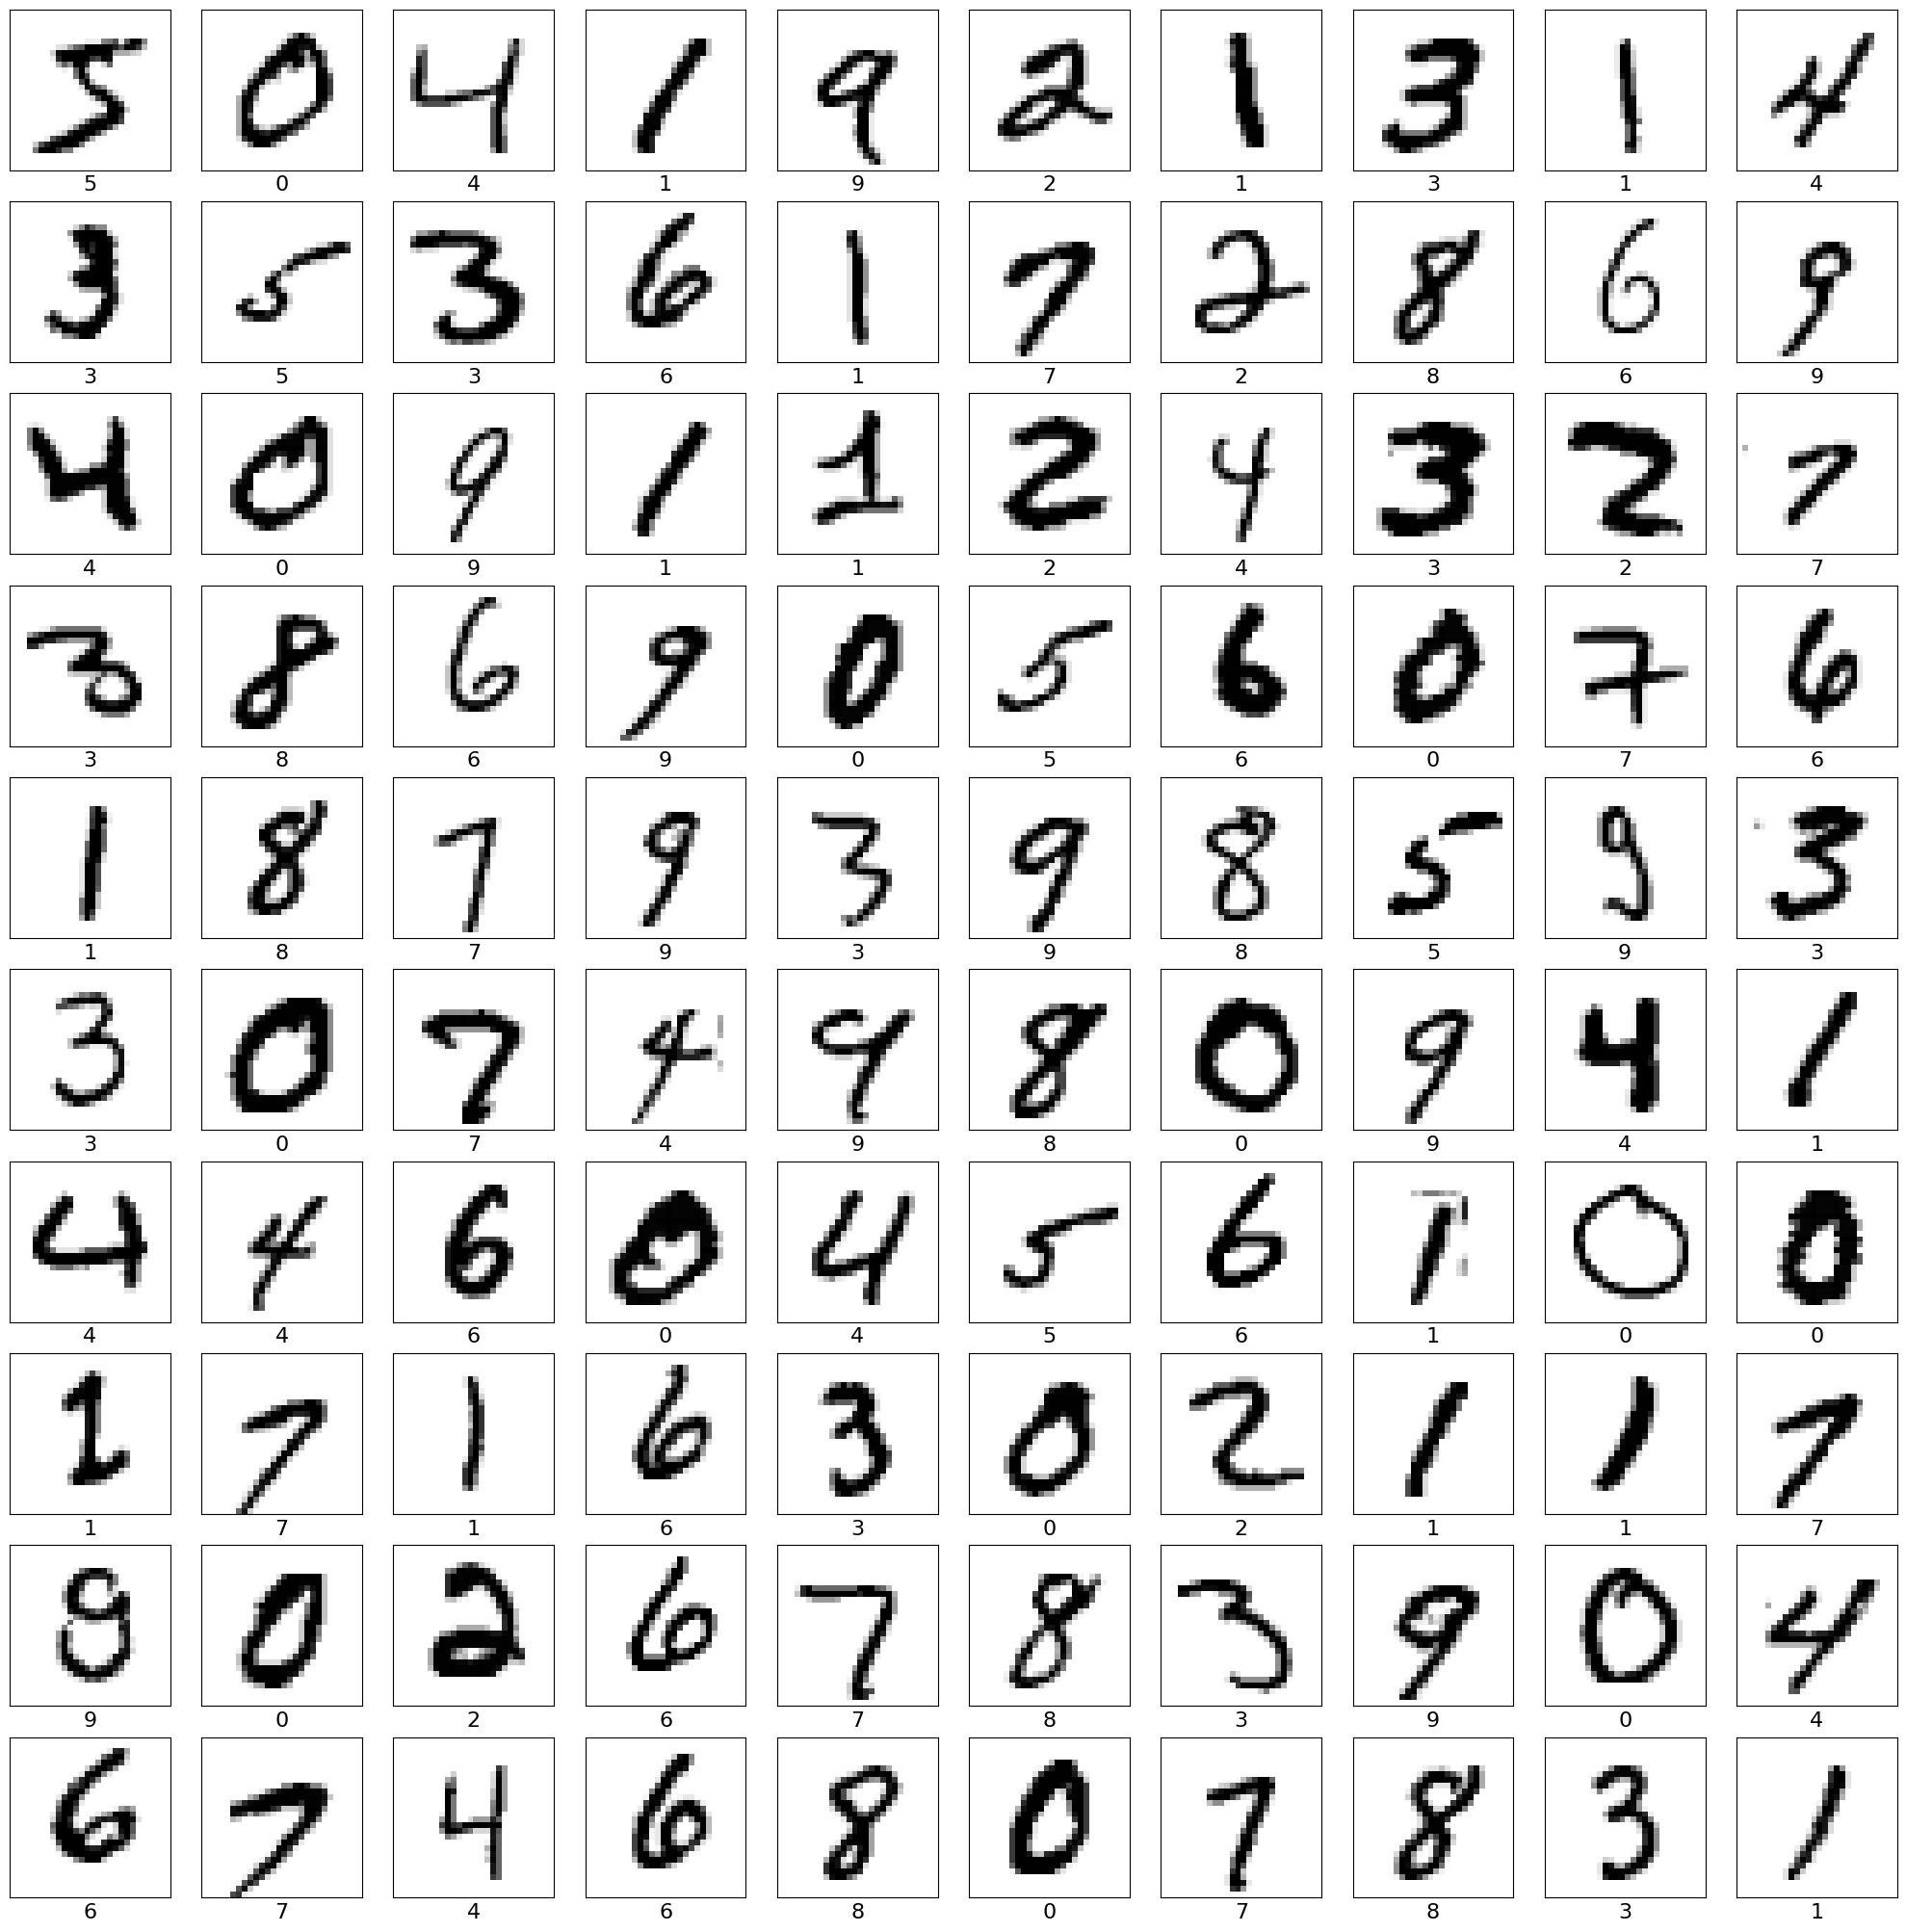

In [20]:
import matplotlib.pyplot as plt

# 调整figsize参数以提供足够的展示空间
plt.figure(figsize=(20,20))  # 增大展示区域的尺寸以便于观看
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # 使用更小的字体尺寸以确保标签能够完全显示
    plt.xlabel(train_labels[i], fontsize=16)
# 使用tight_layout调整布局，增加pad参数以确保有足够的空间显示标签
plt.tight_layout(pad=0.5)
plt.show()

## 随机选择100个不重复的图像，并在一个20x20英寸的画布上以网格形式展示这些图像及其对应的标签。
#### for i, idx in enumerate(indices):：这个循环遍历随机选择的100个索引。enumerate提供了每个索引的位置（i）和值（idx）。
#### plt.subplot(10,10,i+1)：这行代码将画布分割成10x10的网格，并在第i+1个位置绘制子图。这样可以在一个画布上展示100个图像。
#### plt.xticks([])和plt.yticks([])：这两行代码移除了子图的x轴和y轴的刻度标记。
#### plt.grid(False)：这行代码禁用了网格线。
#### plt.imshow(train_images[idx], cmap=plt.cm.binary)：这行代码使用二值颜色映射显示选中的图像。cmap=plt.cm.binary使图像以黑白色显示，适合灰度图像。
#### plt.xlabel(f'Index: {idx}\nLabel: {train_labels[idx]}', fontsize=20)：这行代码在每个图像下方显示图像的索引和标签，字体大小设置为20，标签信息分两行显示。

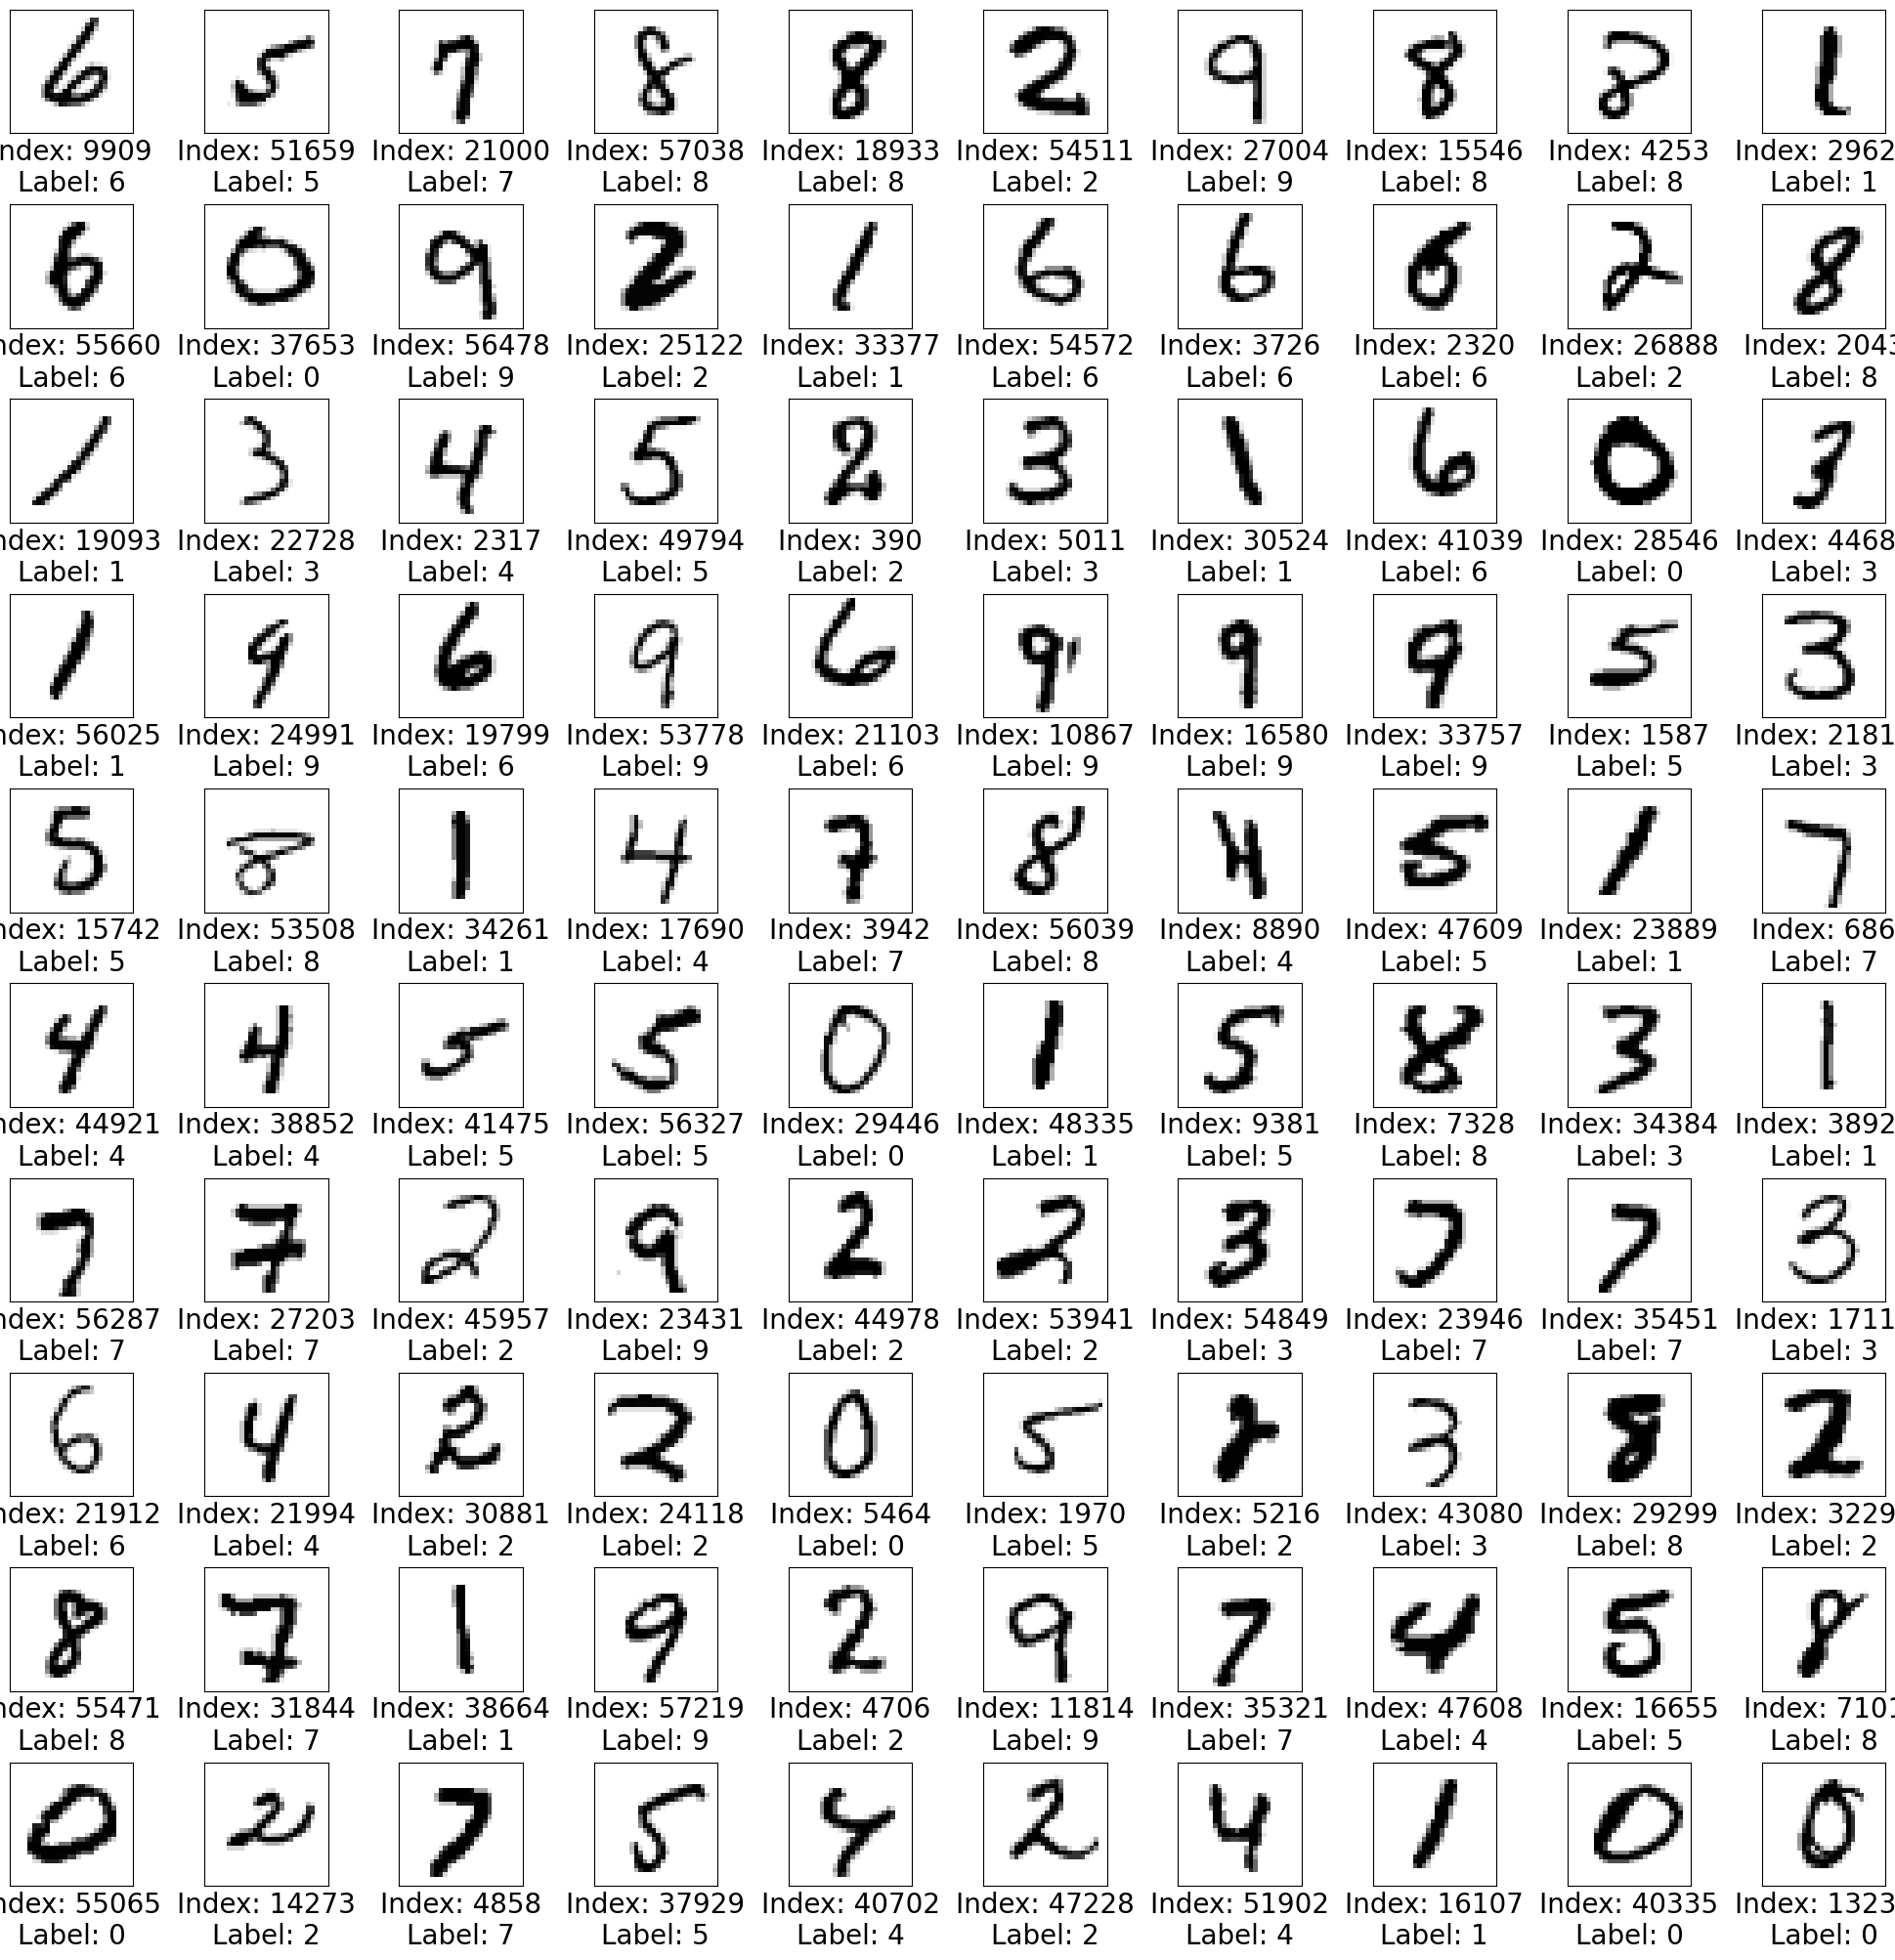

In [21]:
import matplotlib.pyplot as plt

# 假设 train_images 和 train_labels 已经被定义并加载了数据

# 随机选择100个不重复的索引
indices = np.random.choice(train_images.shape[0], 100, replace=False)

# 调整figsize参数以提供足够的展示空间
plt.figure(figsize=(20,20))  # 增大展示区域的尺寸以便于观看

for i, idx in enumerate(indices):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    # 增大字体尺寸，并将索引和标签分成两行显示
    plt.xlabel(f'Index: {idx}\nLabel: {train_labels[idx]}', fontsize=20)  # 调整字体大小为10

# 使用tight_layout调整布局，确保有足够的空间显示标签
plt.tight_layout(pad=0.5)  # 可能需要根据实际情况调整pad值
plt.show()

## 这段代码是使用TensorFlow和Keras定义、编译和概述一个简单的神经网络模型的过程
### 这个模型设计用于处理28x28像素的图像数据，如MNIST手写数字数据集。
#### keras.Sequential：这创建了一个Sequential模型，这是Keras中的一个模型，用于线性堆叠层。这意味着每一层只有一个输入和一个输出，且层与层之间是顺序连接的。
#### layers.Flatten(input_shape=(28, 28))：这是模型的第一层，它将输入的二维图像（28x28像素）转换（"展平"）为一维数组（784个元素）。input_shape=(28, 28)指定了输入数据的形状，这对模型来说是必要的，以便知道数据的输入维度。
#### layers.Dense(512, activation='relu')：这是一个全连接（Dense）层，有512个神经元。它使用ReLU（Rectified Linear Unit）作为激活函数。这一层将从上一层接收到的784个输入特征转换为512个新的特征表示。
#### layers.Dropout(0.2)：这是一个Dropout层，它随机将输入单元的20%设置为0，这是一种减少过拟合的正则化技术。在每次训练步骤中，每个单元都有20%的概率被“丢弃”，这有助于模型学习到更鲁棒的特征。
#### layers.Dense(10, activation='softmax')：这是另一个全连接（Dense）层，有10个神经元，对应于10个类别的输出（对于MNIST数据集，即数字0到9）。它使用softmax激活函数，这使得输出可以被解释为概率分布，每个数字的概率之和为1。

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 预处理数据：添加通道维度，归一化图像数据
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 定义模型
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型概要
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 这段代码使用TensorFlow和Keras框架来训练一个神经网络模型，并保存训练过程中的历史信息。
#### model.fit()：这是Keras中用于训练模型的函数。它将模型的输入数据（train_images）和标签（train_labels）作为参数，并执行指定次数的训练迭代（epochs）。
#### train_images：这是模型训练所使用的图像数据。对于MNIST数据集，这通常是一个形状为(60000, 28, 28)的数组，表示有60,000张28x28像素的手写数字图像。
#### train_labels：这是与train_images相对应的标签数据。对于MNIST数据集，这是一个形状为(60000,)的数组，包含每张图像代表的数字（0-9）。
#### epochs=5：这指定了训练过程应该遍历整个数据集的次数。一个epoch意味着每个样本在训练过程中将被使用一次。
#### batch_size=128：这指定了在更新模型权重之前模型应该处理的样本数量。使用批处理可以提高训练效率，并且通常也有助于提高模型的稳定性和性能。
#### validation_split=0.2：这告诉fit函数将20%的训练数据作为验证数据。在每个epoch结束时，模型将在这部分未参与训练的数据上评估其性能，这有助于监控模型是否过拟合。验证数据是从训练数据集中随机选择的。
### `history：model.fit()函数`返回一个History对象。这个对象包含了训练过程中的详细历史信息，如每个epoch的损失值和准确率，以及验证损失值和准确率（如果有验证集的话）。
### 这些信息对于理解模型训练的动态非常有用，可以用于后续的分析和可视化，比如绘制训练和验证准确率随时间的变化。

In [23]:
# 训练模型，并保存训练历史
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 6s 14ms/step - loss: 0.3187 - accuracy: 0.9090 - val_loss: 0.1593 - val_accuracy: 0.9557
Epoch 2/5
375/375 [==============================] - 6s 15ms/step - loss: 0.1382 - accuracy: 0.9598 - val_loss: 0.1091 - val_accuracy: 0.9674
Epoch 3/5
375/375 [==============================] - 5s 13ms/step - loss: 0.0939 - accuracy: 0.9722 - val_loss: 0.0947 - val_accuracy: 0.9716
Epoch 4/5
375/375 [==============================] - 6s 17ms/step - loss: 0.0729 - accuracy: 0.9786 - val_loss: 0.0872 - val_accuracy: 0.9738
Epoch 5/5
375/375 [==============================] - 5s 13ms/step - loss: 0.0556 - accuracy: 0.9837 - val_loss: 0.0794 - val_accuracy: 0.9768


## 这段代码首先绘制了训练损失和验证损失随着epoch的变化，然后在第二个子图中绘制了训练准确率和验证准确率的变化。
## 这可以帮助你理解模型在训练过程中的表现，比如是否出现了过拟合（即训练准确率持续提高而验证准确率停止提高或开始下降）。
### 通过观察训练和验证的准确率和损失值来监控其学习过程，从而对模型的性能有一个直观的了解。这是深度学习模型开发过程中的一个重要步骤，有助于模型的调优和改进。

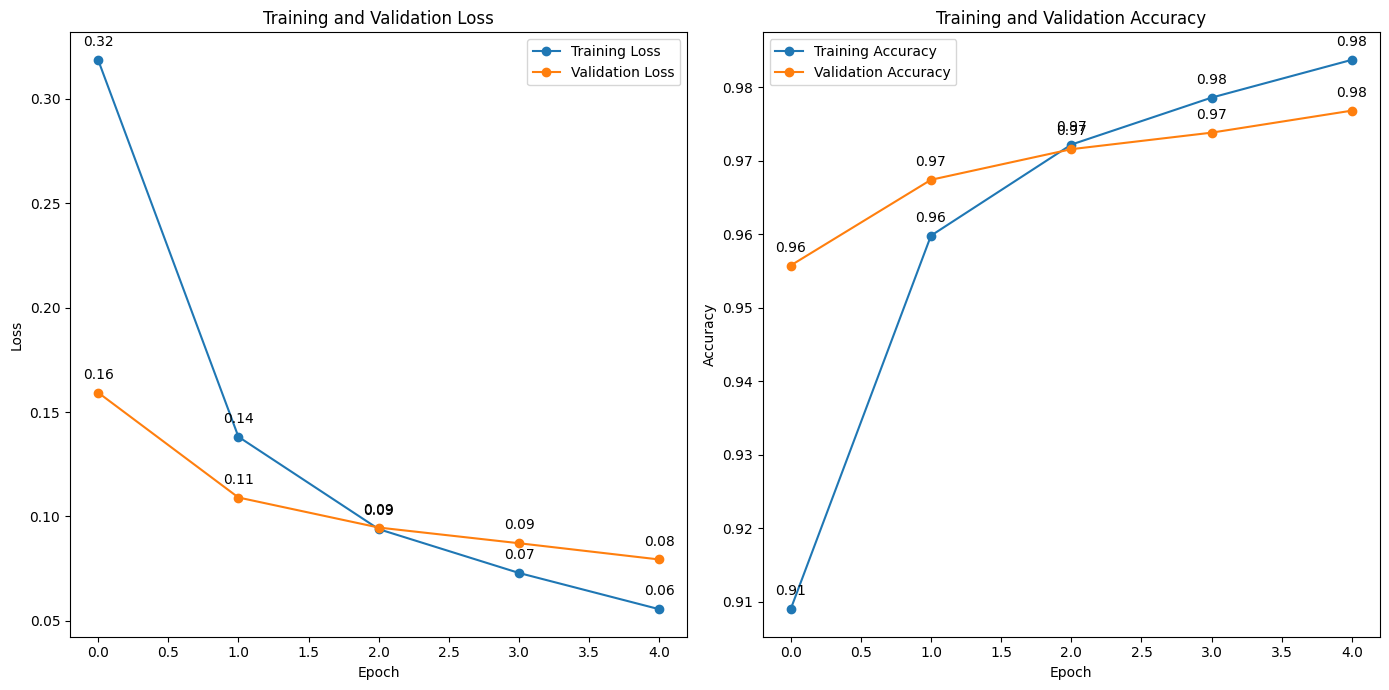

In [24]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(14, 7))

# 绘制训练损失和验证损失
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 在每个点旁边标注数值
for i, txt in enumerate(history.history['loss']):
    plt.annotate(f"{txt:.2f}", (i, history.history['loss'][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(history.history['val_loss']):
    plt.annotate(f"{txt:.2f}", (i, history.history['val_loss'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制训练准确率和验证准确率
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 在每个点旁边标注数值
for i, txt in enumerate(history.history['accuracy']):
    plt.annotate(f"{txt:.2f}", (i, history.history['accuracy'][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(history.history['val_accuracy']):
    plt.annotate(f"{txt:.2f}", (i, history.history['val_accuracy'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

In [25]:
# 使用 NumPy 的 load 函数直接加载 .npz 文件。
# allow_pickle=True 参数允许加载存储在npz文件中的对象数组，这是因为MNIST数据集的标签是以列表形式存储的。
with np.load(path, allow_pickle=True) as f:
    # 从文件中提取训练集的图像和标签。
    # f['x_train'] 获取训练集图像，这是一个形状为 (60000, 28, 28) 的数组，
    # 表示有60,000个样本，每个样本是28x28像素的图像。
    train_images, train_labels = f['x_train'], f['y_train']

    # 从文件中提取测试集的图像和标签。
    # f['x_test'] 获取测试集图像，这是一个形状为 (10000, 28, 28) 的数组，
    # 表示有10,000个样本，每个样本是28x28像素的图像。
    test_images, test_labels = f['x_test'], f['y_test']

## 改善上述模型以便更好地适应MNIST数据集，我们可以考虑以下几个方面的调整：
### 输入层的调整：确保模型的输入层与MNIST图像的形状相匹配。MNIST图像的大小为28x28像素，通常我们会将这些图像平铺成784个特征的一维数组来作为模型的输入。
### 正则化：为了防止过拟合，可以在模型中添加Dropout层或使用其他正则化技术。
### 模型复杂度：根据需要调整隐藏层的数量和大小。对于MNIST这样相对简单的问题，可能不需要太复杂的网络。
### 优化器和学习率：选择合适的优化器和学习率也很重要，这可以影响模型的训练速度和性能。|
### 批量大小和训练周期：适当选择批量大小和训练周期（epochs）以获得最佳性能。
### 基于以上考虑，下面是一个改进后的模型示例：

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

# 预处理数据：添加通道维度，归一化图像数据
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 定义模型
model = keras.Sequential([
    # 输入层，指定输入的形状
    layers.InputLayer(input_shape=(28, 28, 1)),

    # 第一个卷积层，32个过滤器，大小为3x3，使用ReLU激活函数
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    # 第一个池化层，使用2x2的池化窗口
    layers.MaxPooling2D(pool_size=(2, 2)),

    # 第二个卷积层，64个过滤器，大小为3x3，使用ReLU激活函数
    layers.Conv2D(64, (3, 3), activation='relu'),
    # 第二个池化层，使用2x2的池化窗口
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Dropout层，随机丢弃25%的神经元，以防止过拟合
    layers.Dropout(0.25),

    # Flatten层，将多维的输出平铺成一维数组
    layers.Flatten(),

    # 密集层，128个神经元，使用ReLU激活函数
    layers.Dense(128, activation='relu'),
    # Dropout层，随机丢弃50%的神经元，以防止过拟合
    layers.Dropout(0.5),

    # 输出层，10个神经元对应10个类别，使用softmax激活函数
    layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型概要
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

In [33]:
# 训练模型，并保存训练历史
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 43s 113ms/step - loss: 1.3500 - accuracy: 0.5447 - val_loss: 0.4345 - val_accuracy: 0.8826
Epoch 2/5
375/375 [==============================] - 39s 105ms/step - loss: 0.5264 - accuracy: 0.8374 - val_loss: 0.2632 - val_accuracy: 0.9286
Epoch 3/5
375/375 [==============================] - 40s 108ms/step - loss: 0.3827 - accuracy: 0.8834 - val_loss: 0.1879 - val_accuracy: 0.9494
Epoch 4/5
375/375 [==============================] - 39s 105ms/step - loss: 0.3070 - accuracy: 0.9078 - val_loss: 0.1548 - val_accuracy: 0.9572
Epoch 5/5
375/375 [==============================] - 40s 105ms/step - loss: 0.2679 - accuracy: 0.9202 - val_loss: 0.1307 - val_accuracy: 0.9637


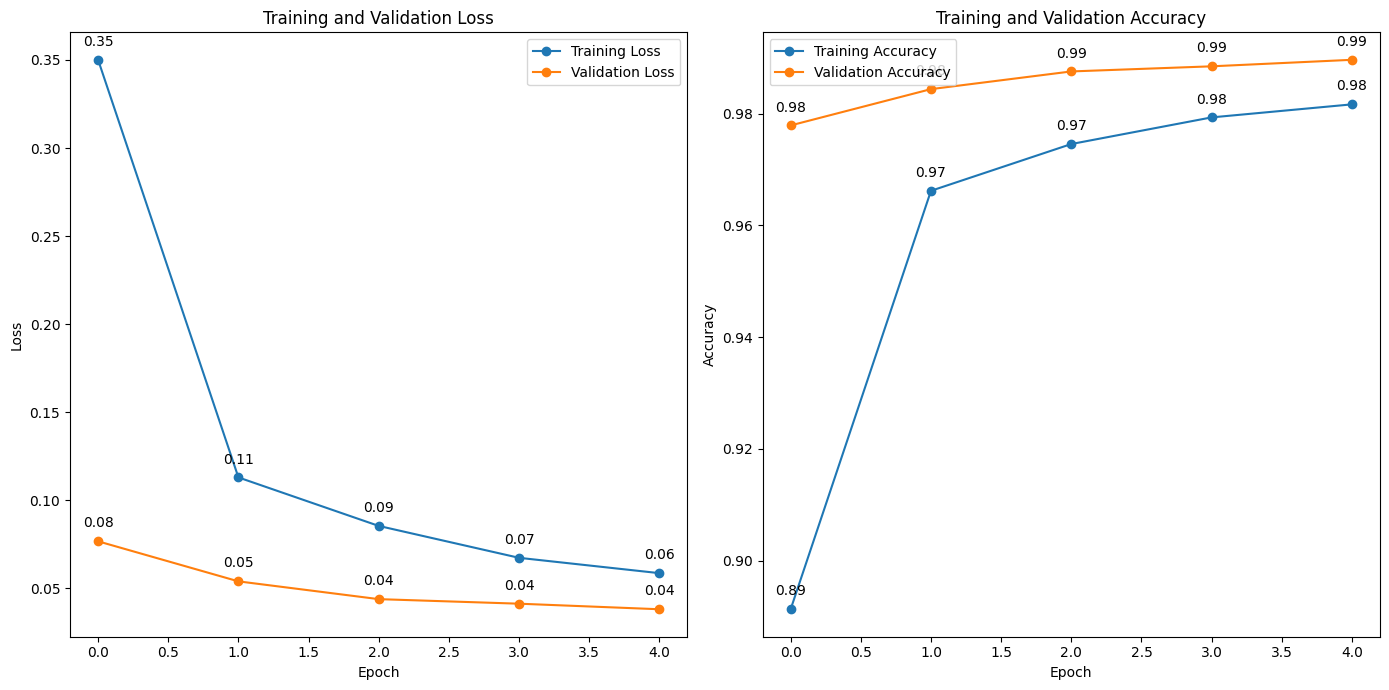

In [30]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(14, 7))

# 绘制训练损失和验证损失
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 在每个点旁边标注数值
for i, txt in enumerate(history.history['loss']):
    plt.annotate(f"{txt:.2f}", (i, history.history['loss'][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(history.history['val_loss']):
    plt.annotate(f"{txt:.2f}", (i, history.history['val_loss'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# 绘制训练准确率和验证准确率
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 在每个点旁边标注数值
for i, txt in enumerate(history.history['accuracy']):
    plt.annotate(f"{txt:.2f}", (i, history.history['accuracy'][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(history.history['val_accuracy']):
    plt.annotate(f"{txt:.2f}", (i, history.history['val_accuracy'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

### 这段代码首先使用模型对测试集的图像进行预测，然后找出那些预测标签和真实标签不匹配的图像索引。
### plot_misclassified_images 函数定义了一个简单的方式来可视化这些错误分类的图像，包括它们的真实标签和预测标签。

313/313 [==============================] - 3s 9ms/step


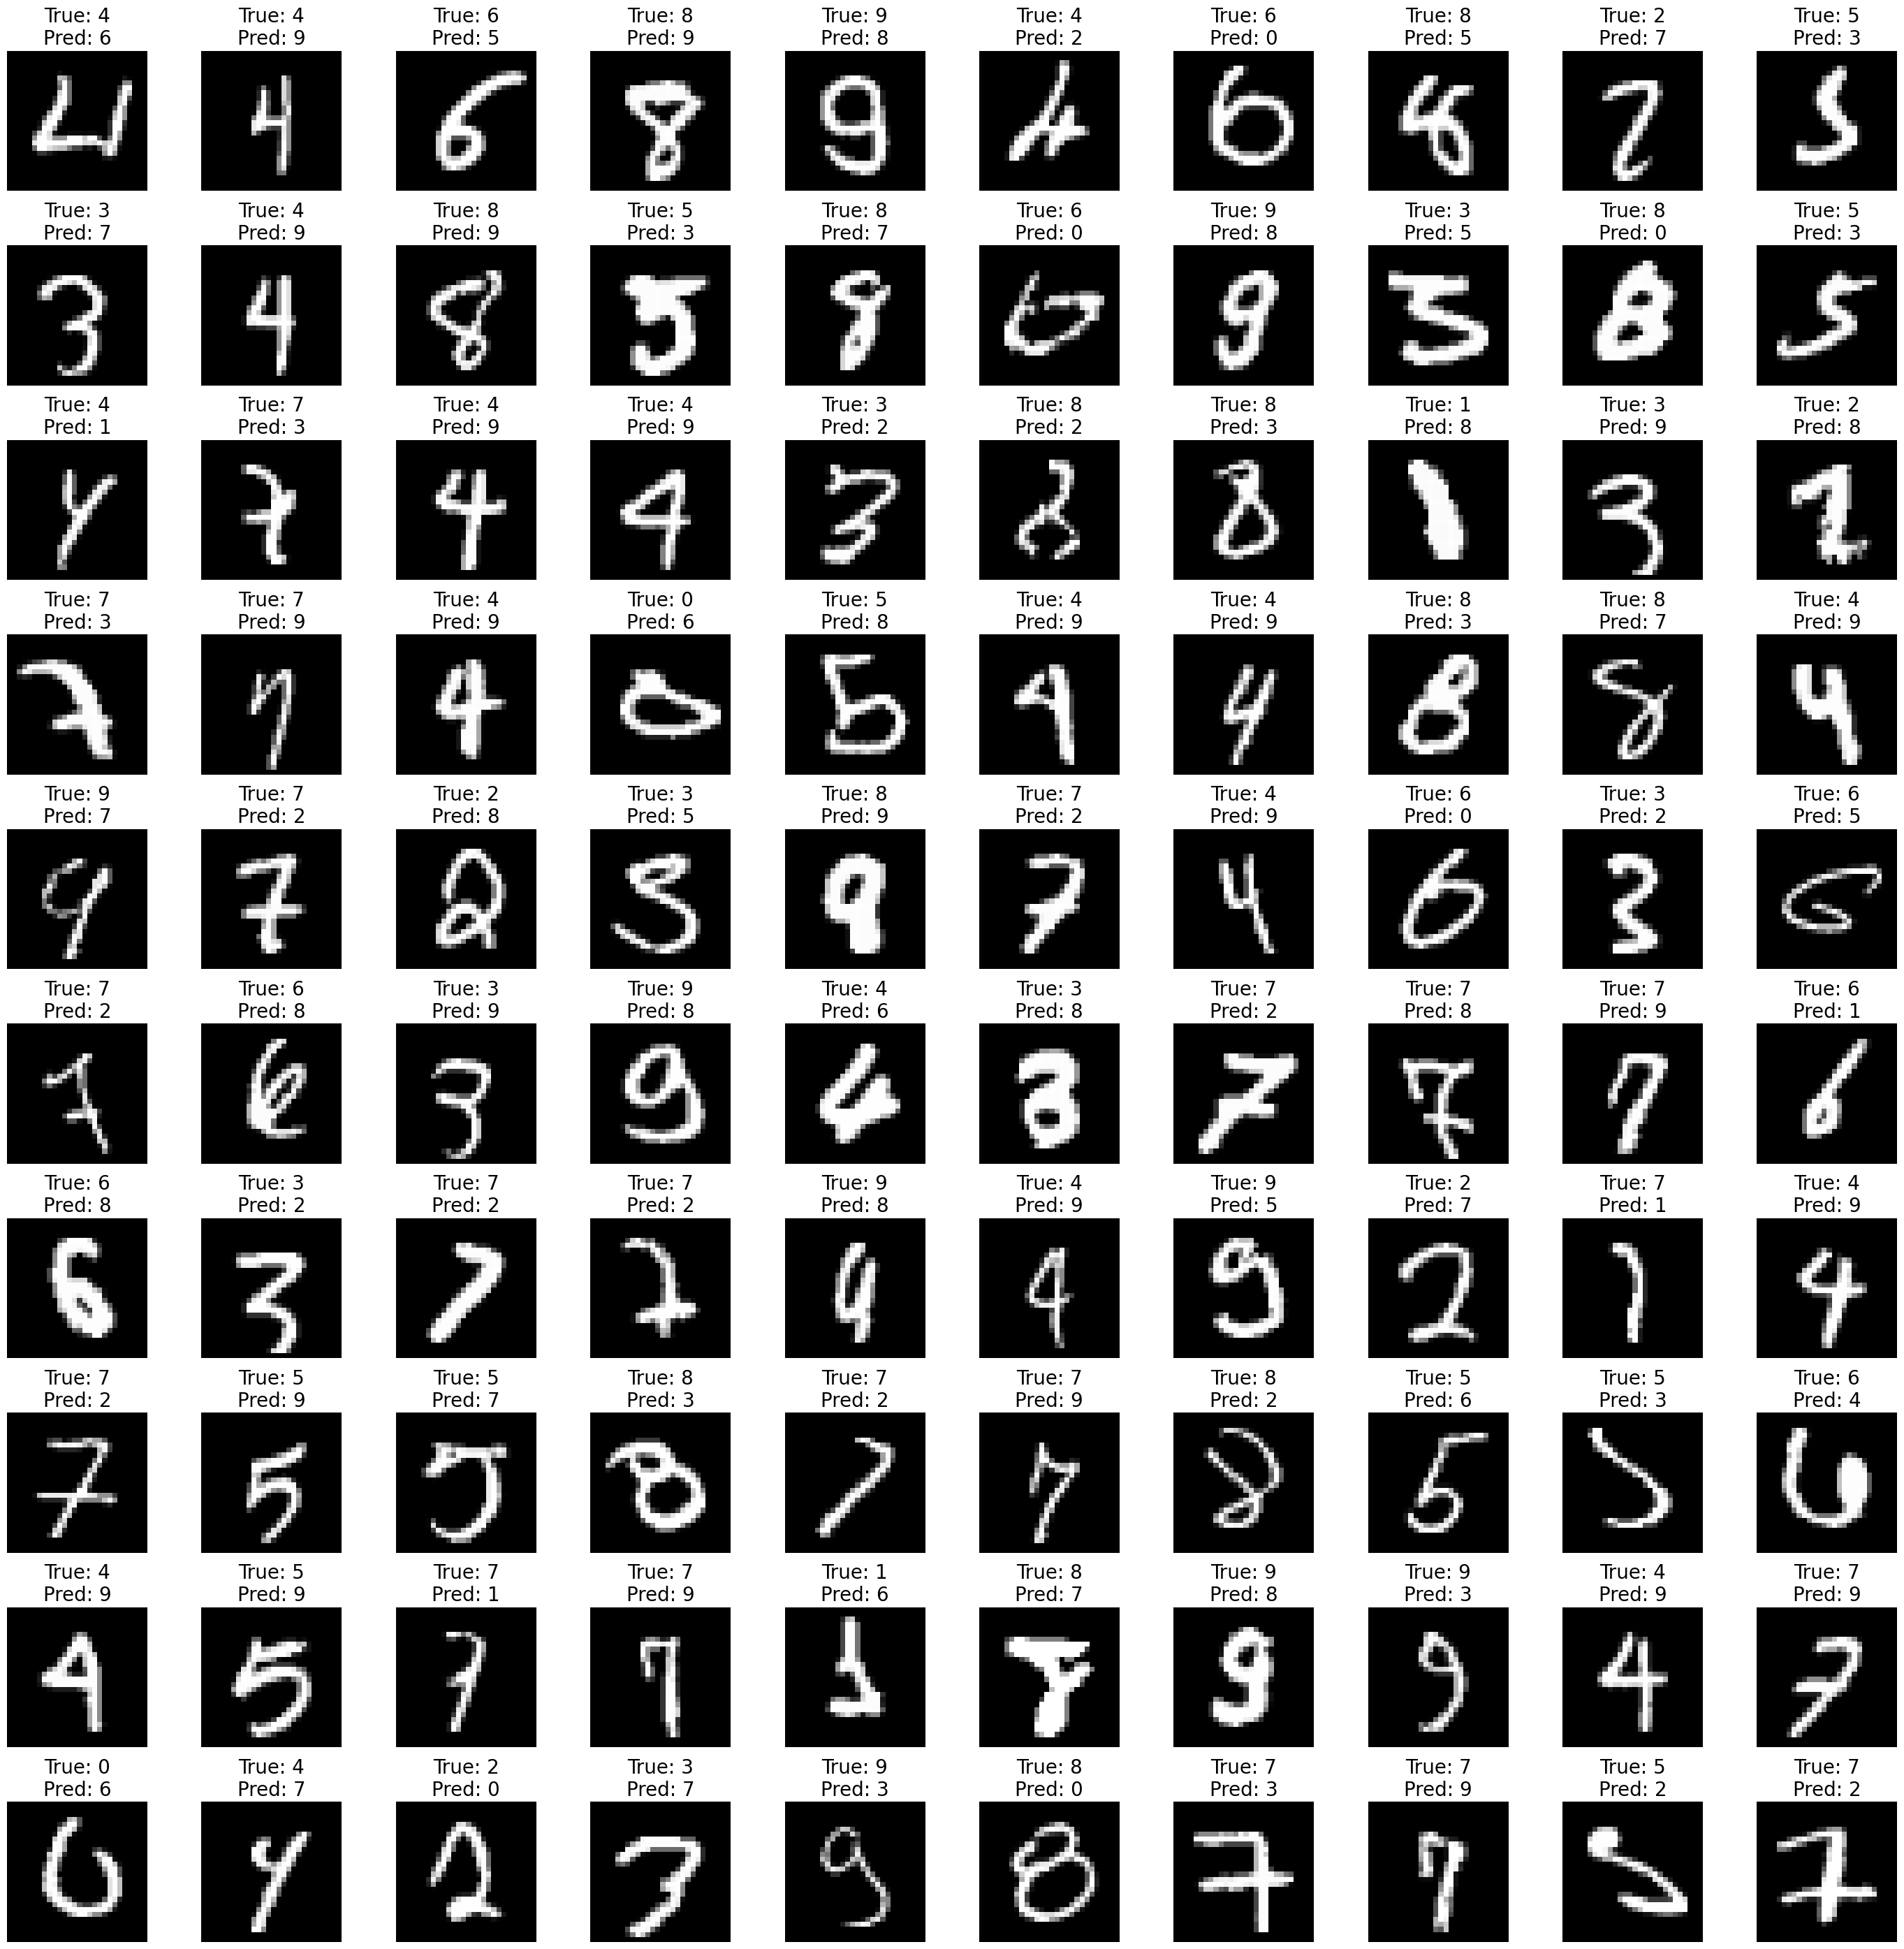

In [ ]:
# 对测试集进行预测
predictions = model.predict(test_images)

# 预测标签是概率数组中最大值的索引
predicted_labels = np.argmax(predictions, axis=1)

# 接下来，您可以继续使用predicted_labels
# 例如，找出预测错误的索引
misclassified_indices = np.where(predicted_labels != test_labels)[0]

# 现在，您可以安全地调用plot_misclassified_images_in_batches函数
plot_misclassified_images_in_batches(test_images, test_labels, predicted_labels, misclassified_indices, batch_size=100, figsize=(28, 28))

In [35]:
def plot_misclassified_images(images, true_labels, predicted_labels, indices, count, figsize=(40, 40)):
    """
    显示指定数量的错误分类图像。
    """
    # 确保行数足够以容纳所有图像
    rows = count // 10 + (1 if count % 10 else 0)
    plt.figure(figsize=figsize)
    for i, index in enumerate(indices[:count]):
        plt.subplot(rows, 10, i + 1)  # 动态计算所需的行数
        plt.imshow(images[index].reshape(28, 28), cmap='gray', interpolation='none')
        plt.title(f"True: {true_labels[index]}\nPred: {predicted_labels[index]}", fontsize=20)  # 可调整字体大小以适应显示
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_misclassified_images_in_batches(images, true_labels, predicted_labels, indices, batch_size=100, figsize=(40, 40)):
    """
    以批次方式显示错误分类的图像。
    """
    num_batches = len(indices) // batch_size + (1 if len(indices) % batch_size else 0)
    for batch in range(num_batches):
        start = batch * batch_size
        end = min(start + batch_size, len(indices))
        # 调整figsize参数以适应100张图像的显示
        plot_misclassified_images(images, true_labels, predicted_labels, indices[start:end], count=end-start, figsize=figsize)
        if end == len(indices):
            print("已显示所有错误分类的图像。")
            break
        if input(f"显示了 {end} 张图像。输入 'n' 以停止，或按 Enter 继续查看下一批次：").strip().lower() == 'n':
            print("停止显示。")
            break

# 现在，每批次显示100张图像，且图像显示得更大
plot_misclassified_images_in_batches(test_images, test_labels, predicted_labels, misclassified_indices, batch_size=100, figsize=(28, 28))

NameError: name 'predicted_labels' is not defined